In [1]:
# ============================================================================
# Interactive Exploration of Alpaca EMS and Embedding Services
# ============================================================================
# 
# This notebook explores the two core services that form the foundation of our
# algorithmic trading system:
# 
# 1. AlpacaService (EMS - Execution Management System): Handles all market 
#    data retrieval and order execution through Alpaca's APIs
# 2. EmbeddingService: Converts financial news into numerical representations
#    that our machine learning model can process
#
# Think of this as your "trading desk exploration" - you're learning to use
# the tools that institutional traders rely on for market data and execution.
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import our custom services
from src.services.alpaca_service import AlpacaService
from src.services.embedding_service import EmbeddingService
from src.config.settings import settings
from alpaca.data.timeframe import TimeFrame

# Set up plotting style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 Welcome to the Algorithmic Trading System Explorer!")
print("=" * 60)


/workspace/.venv/lib/python3.13/site-packages/transformers/utils/hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


🚀 Welcome to the Algorithmic Trading System Explorer!


In [2]:
# ============================================================================
# PART 1: EXPLORING THE ALPACA SERVICE (EXECUTION MANAGEMENT SYSTEM)
# ============================================================================
# 
# The AlpacaService is your gateway to financial markets. In institutional 
# trading, this would be called an "Execution Management System" (EMS). 
# It handles:
# - Account management and risk monitoring
# - Historical market data retrieval
# - News data collection
# - Order submission and tracking
#
# Let's explore each capability step by step.
# ============================================================================

print("\n📊 PART 1: Exploring the Alpaca Service (Your Trading Interface)")
print("-" * 60)

# Initialize the Alpaca service
# This creates connections to Alpaca's Trading API, Market Data API, and News API
print("Initializing Alpaca Service (connecting to paper trading environment)...")
alpaca = AlpacaService()
# EXPLORATION 1: Account Information and Risk Dashboard
# =====================================================
# Before any trading, you need to understand your account status.
# This is like checking your "risk dashboard" in institutional trading.

async def explore_account_info():
    """
    Explore your account information and understand what each metric means
    for algorithmic trading risk management.
    """
    print("\n🏦 Account Information & Risk Dashboard")
    print("=" * 40)
    

    try:
        account_info = await alpaca.get_account_info()
        # Display key account metrics with financial context
        print(f"Account ID: {account_info.id}")
        print(f"💰 Buying Power: ${float(account_info.buying_power):,.2f}")
        print(f"   └─ This is how much you can spend on new positions")
        print(f"💵 Available Cash: ${float(account_info.cash):,.2f}")
        print(f"   └─ Actual cash available (buying power includes margin)")
        print(f"📈 Portfolio Value: ${float(account_info.portfolio_value):,.2f}")
        print(f"   └─ Total value of cash + positions")
        print(f"🎯 Day Trade Count: {int(account_info.daytrade_count)}")
        print(f"   └─ Number of day trades in the last 5 business days")
        print(f"⚠️  Pattern Day Trader: {account_info.pattern_day_trader}")
        print(f"   └─ If True, you need $25k minimum account value")
        
        # Calculate some useful derived metrics
        cash_ratio = float(account_info.cash) / float(account_info.portfolio_value)
        print(f"\n📊 Derived Risk Metrics:")
        print(f"   Cash Ratio: {cash_ratio:.1%} (higher = more conservative)")
        
        # Risk assessment based on account status
        if account_info.trading_blocked:
            print("🛑 WARNING: Trading is currently blocked on this account!")
        elif cash_ratio < 0.05:
            print("⚠️  Note: Low cash ratio - consider risk management")
        else:
            print("✅ Account looks healthy for algorithmic trading")
            
        return account_info
        
    except Exception as e:
        print(f"❌ Error retrieving account info: {e}")
        print("💡 Make sure your Alpaca API keys are configured correctly")
        return None

# Run the account exploration
account_data = await explore_account_info()


📊 PART 1: Exploring the Alpaca Service (Your Trading Interface)
------------------------------------------------------------
Initializing Alpaca Service (connecting to paper trading environment)...

🏦 Account Information & Risk Dashboard
Account ID: b69547a9-5c1e-4ed0-a90a-8c638ca6a774
💰 Buying Power: $199,392.19
   └─ This is how much you can spend on new positions
💵 Available Cash: $99,223.26
   └─ Actual cash available (buying power includes margin)
📈 Portfolio Value: $100,168.93
   └─ Total value of cash + positions
🎯 Day Trade Count: 0
   └─ Number of day trades in the last 5 business days
⚠️  Pattern Day Trader: False
   └─ If True, you need $25k minimum account value

📊 Derived Risk Metrics:
   Cash Ratio: 99.1% (higher = more conservative)
✅ Account looks healthy for algorithmic trading


In [3]:
from datetime import datetime, timedelta
from alpaca.data.requests import NewsRequest

end_date = datetime.now()
start_date = end_date - timedelta(days=5)

request = NewsRequest(
    symbols="SPY,",
    start=start_date,
    end=end_date,
    limit=1000
)

news = alpaca.news_client.get_news(request)

In [4]:
news.df.columns

Index(['headline', 'source', 'url', 'summary', 'created_at', 'updated_at',
       'symbols', 'author', 'content', 'images'],
      dtype='object')

In [ ]:
news_df = news.df.reset_index()
# Take a peak at the data structure
print(news_df.columns)
print(news_df.head())



try:
    news = self.news_client.get_news(request)
    news_df = news.df.reset_index()



📈 Historical Market Data Analysis
Fetching SPY historical data (this may take a moment)...
✅ Retrieved 16143 days of SPY data
Date range: 2025-06-05 23:12:00+00:00 to 2025-07-03 20:59:00+00:00

📋 Data Structure:
Columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'returns', 'volatility', 'volume_sma', 'session']
Sample data:
                  timestamp    open    high     low   close  volume  returns  \
0 2025-06-05 23:12:00+00:00  593.00  593.00  593.00  593.00   327.0      0.0   
1 2025-06-05 23:13:00+00:00  592.95  592.98  592.95  592.97  3324.0     -0.0   
2 2025-06-05 23:14:00+00:00  593.01  593.01  593.01  593.01   182.0      0.0   

   volatility  volume_sma     session  
0         0.0     1199.65  afterhours  
1         0.0     1325.85  afterhours  
2         0.0     1322.80  afterhours  

📊 Trading Statistics:
Average Daily Return: 0.0000 (0.08% annualized)
Daily Volatility: 0.0003 (0.40% annualized)
Days with >2% moves: 0 (0.0% of days)


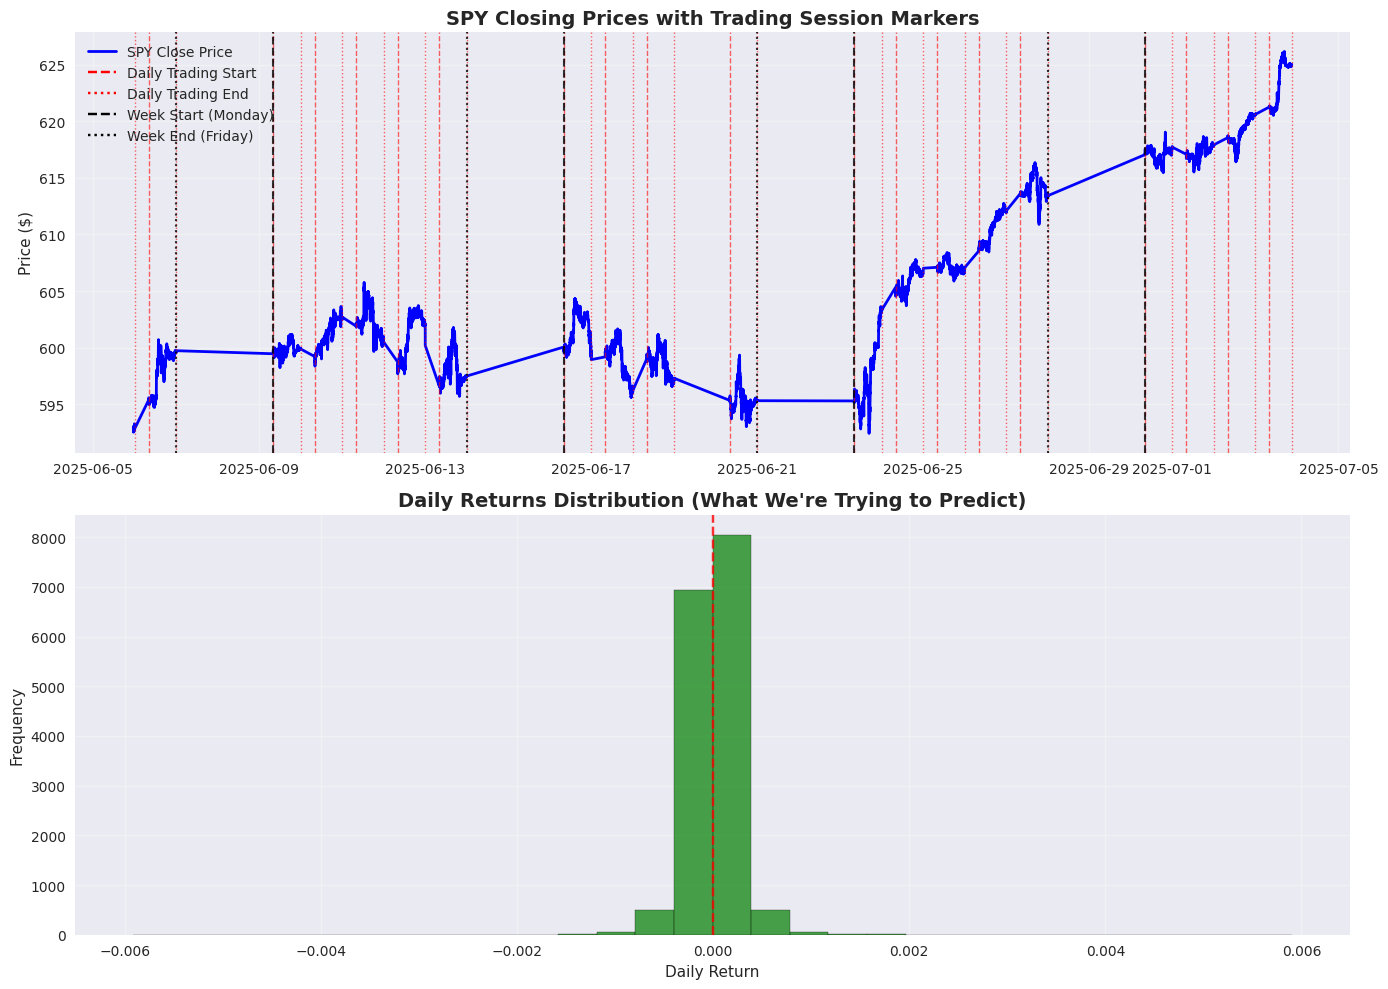


📅 Trading Session Markers Added:
   Red dashed lines: Daily premarket starts
   Red dotted lines: Daily afterhours ends
   Black dashed lines: Weekly starts (Monday premarket)
   Black dotted lines: Weekly ends (Friday afterhours)
   Total trading days marked: 20


In [25]:
from matplotlib.lines import Line2D


# EXPLORATION 2: Historical Market Data Analysis
# ==============================================
# Understanding price patterns is crucial for algorithmic trading.
# Let's fetch and analyze SPY data to see what our model will be predicting.

async def explore_market_data():
    """
    Fetch and analyze historical price data for SPY to understand
    the patterns our algorithm will be trying to predict.
    """
    print("\n\n📈 Historical Market Data Analysis")
    print("=" * 40)
    
    try:
        # Fetch SPY data (S&P 500 ETF - our target instrument)
        print("Fetching SPY historical data (this may take a moment)...")
        spy_data = await alpaca.fetch_historical_prices(
            symbol_or_symbols="SPY", 
            days_back=20, # Last ~3 months of trading data
            timeframe=TimeFrame.Minute
        )
        
        print(f"✅ Retrieved {len(spy_data)} days of SPY data")
        print(f"Date range: {spy_data['timestamp'].min()} to {spy_data['timestamp'].max()}")
        
        # Analyze the data structure
        print(f"\n📋 Data Structure:")
        print(f"Columns: {list(spy_data.columns)}")
        print(f"Sample data:")
        print(spy_data.head(3).round(2))
        
        # Calculate some trading statistics
        print(f"\n📊 Trading Statistics:")
        avg_daily_return = spy_data['returns'].mean()
        volatility = spy_data['returns'].std()
        print(f"Average Daily Return: {avg_daily_return:.4f} ({avg_daily_return*252:.2%} annualized)")
        print(f"Daily Volatility: {volatility:.4f} ({volatility*np.sqrt(252):.2%} annualized)")
        
        # Identify some interesting patterns
        big_moves = spy_data[abs(spy_data['returns']) > 0.02]
        print(f"Days with >2% moves: {len(big_moves)} ({len(big_moves)/len(spy_data):.1%} of days)")
        
        # Create a simple visualization with trading session markers
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
        
        # Price chart
        ax1.plot(spy_data['timestamp'], spy_data['close'], linewidth=2, color='blue')
        ax1.set_title('SPY Closing Prices with Trading Session Markers', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Price ($)')
        ax1.grid(True, alpha=0.3)
        
        # Add trading session markers
        # Get unique dates and add session markers
        spy_data['date'] = spy_data['timestamp'].dt.date
        unique_dates = sorted(spy_data['date'].unique())
        
        for date in unique_dates:
            day_data = spy_data[spy_data['date'] == date]
            if len(day_data) == 0:
                continue
                
            weekday = date.weekday()  # 0=Monday, 6=Sunday
            
            # Find premarket start and afterhours end for this day
            premarket_data = day_data[day_data['session'] == 'premarket']
            afterhours_data = day_data[day_data['session'] == 'afterhours']
            
            # Premarket start (beginning of trading day) - dashed red
            if len(premarket_data) > 0:
                premarket_start = premarket_data['timestamp'].min()
                ax1.axvline(premarket_start, color='red', linestyle='--', alpha=0.6, linewidth=1)
            
            # Afterhours end (end of trading day) - dotted red
            if len(afterhours_data) > 0:
                afterhours_end = afterhours_data['timestamp'].max()
                ax1.axvline(afterhours_end, color='red', linestyle=':', alpha=0.6, linewidth=1)
            
            # Weekend markers (Monday start and Friday end)
            if weekday == 0:  # Monday - start of week (dashed black)
                if len(premarket_data) > 0:
                    week_start = premarket_data['timestamp'].min()
                    ax1.axvline(week_start, color='black', linestyle='--', alpha=0.8, linewidth=1.5)
            elif weekday == 4:  # Friday - end of week (dotted black)
                if len(afterhours_data) > 0:
                    week_end = afterhours_data['timestamp'].max()
                    ax1.axvline(week_end, color='black', linestyle=':', alpha=0.8, linewidth=1.5)
        
        # Add legend for the markers
        legend_elements = [
            Line2D([0], [0], color='blue', linewidth=2, label='SPY Close Price'),
            Line2D([0], [0], color='red', linestyle='--', label='Daily Trading Start'),
            Line2D([0], [0], color='red', linestyle=':', label='Daily Trading End'),
            Line2D([0], [0], color='black', linestyle='--', label='Week Start (Monday)'),
            Line2D([0], [0], color='black', linestyle=':', label='Week End (Friday)')
        ]
        ax1.legend(handles=legend_elements, loc='upper left', fontsize=10)
        
        # Daily returns distribution
        ax2.hist(spy_data['returns'].dropna(), bins=30, alpha=0.7, color='green', edgecolor='black')
        ax2.axvline(0, color='red', linestyle='--', alpha=0.8)
        ax2.set_title('Daily Returns Distribution (What We\'re Trying to Predict)', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Daily Return')
        ax2.set_ylabel('Frequency')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print summary of trading sessions marked
        print(f"\n📅 Trading Session Markers Added:")
        print(f"   Red dashed lines: Daily premarket starts")
        print(f"   Red dotted lines: Daily afterhours ends")
        print(f"   Black dashed lines: Weekly starts (Monday premarket)")
        print(f"   Black dotted lines: Weekly ends (Friday afterhours)")
        print(f"   Total trading days marked: {len(unique_dates)}")
        
        return spy_data
        
    except Exception as e:
        print(f"❌ Error fetching market data: {e}")
        return None

# Run the market data exploration
market_data = await explore_market_data()


In [ ]:

# EXPLORATION 3: News Data Collection and Analysis
# ================================================
# News sentiment drives our predictions. Let's see what kind of news
# data we can collect and how it relates to market movements.

async def explore_news_data():
    """
    Fetch and analyze financial news data to understand the information
    that will drive our sentiment-based predictions.
    """
    print("\n\n📰 Financial News Data Analysis")
    print("=" * 40)
    
    try:
        # Fetch recent news for SPY
        print("Fetching recent SPY news data...")
        news_data = await alpaca.fetch_news_data(
            comma_separated_symbols="SPY",
            days_back=7,  # Last week's news
            max_articles=100
        )
        print(f"news_data.columns: {news_data.columns}")
        
        if news_data.empty:
            print("⚠️  No news data retrieved. This might be due to:")
            print("   - API limitations in paper trading")
            print("   - Weekend/holiday period")
            print("   - Network connectivity issues")
            return None
        
        print(f"✅ Retrieved {len(news_data)} news articles")
        
        # Analyze news data structure and content
        print(f"\n📋 News Data Structure:")
        print(f"Columns: {list(news_data.columns)}")
        print(f"Date range: {news_data['published_at'].min()} to {news_data['published_at'].max()}")
        
        # Show sample headlines
        print(f"\n📰 Sample Headlines:")
        for i, headline in enumerate(news_data['headline'].head(5)):
            print(f"{i+1:2d}. {headline[:80]}{'...' if len(headline) > 80 else ''}")
        
        # Analyze news sources
        source_counts = news_data['source'].value_counts().head(5)
        print(f"\n📊 Top News Sources:")
        for source, count in source_counts.items():
            print(f"   {source}: {count} articles")
        
        # Analyze temporal distribution
        news_data['hour'] = news_data['published_at'].dt.hour
        hourly_distribution = news_data['hour'].value_counts().sort_index()
        
        print(f"\n⏰ News Publication Timing:")
        print("Hour | Count | Visualization")
        print("-" * 35)
        for hour, count in hourly_distribution.head(10).items():
            bar = "█" * (count // 2) if count > 0 else ""
            print(f"{hour:4d} | {count:5d} | {bar}")
        
        return news_data
        
    except Exception as e:
        print(f"❌ Error fetching news data: {e}")
        print("💡 Note: News data might be limited in paper trading environment")
        return None

# Run the news data exploration
news_data = await explore_news_data()




📰 Financial News Data Analysis
Fetching recent SPY news data...
Index(['id', 'headline', 'source', 'url', 'summary', 'created_at',
       'updated_at', 'symbols', 'author', 'content', 'images'],
      dtype='object')
         id                                           headline    source  \
0  46260136  Tom Lee Says Institutional Investors 'Hate Thi...  benzinga   
1  46259886  Elon Musk's Tesla Is A 'Multi-Trillion-Dollar ...  benzinga   
2  46259795  Everyone Talked About Nvidia, Apple And Tesla,...  benzinga   
3  46258864  Ray Dalio Warns US Debt Per Family Will Rise 8...  benzinga   
4  46257861  Jim Cramer Contradicts AI-Led Job Cuts At Whit...  benzinga   

                                                 url  \
0  https://www.benzinga.com/markets/equities/25/0...   
1  https://www.benzinga.com/markets/equities/25/0...   
2  https://www.benzinga.com/markets/equities/25/0...   
3  https://www.benzinga.com/news/politics/25/07/4...   
4  https://www.benzinga.com/markets/tech/25/

In [31]:
type(news_data)

NoneType

Index(['id', 'headline', 'source', 'url', 'summary', 'created_at',
       'updated_at', 'symbols', 'author', 'content', 'images'],
      dtype='object')
         id                                           headline    source  \
0  46260136  Tom Lee Says Institutional Investors 'Hate Thi...  benzinga   
1  46259886  Elon Musk's Tesla Is A 'Multi-Trillion-Dollar ...  benzinga   
2  46259795  Everyone Talked About Nvidia, Apple And Tesla,...  benzinga   
3  46258864  Ray Dalio Warns US Debt Per Family Will Rise 8...  benzinga   
4  46257861  Jim Cramer Contradicts AI-Led Job Cuts At Whit...  benzinga   

                                                 url  \
0  https://www.benzinga.com/markets/equities/25/0...   
1  https://www.benzinga.com/markets/equities/25/0...   
2  https://www.benzinga.com/markets/equities/25/0...   
3  https://www.benzinga.com/news/politics/25/07/4...   
4  https://www.benzinga.com/markets/tech/25/07/46...   

                                             summary 

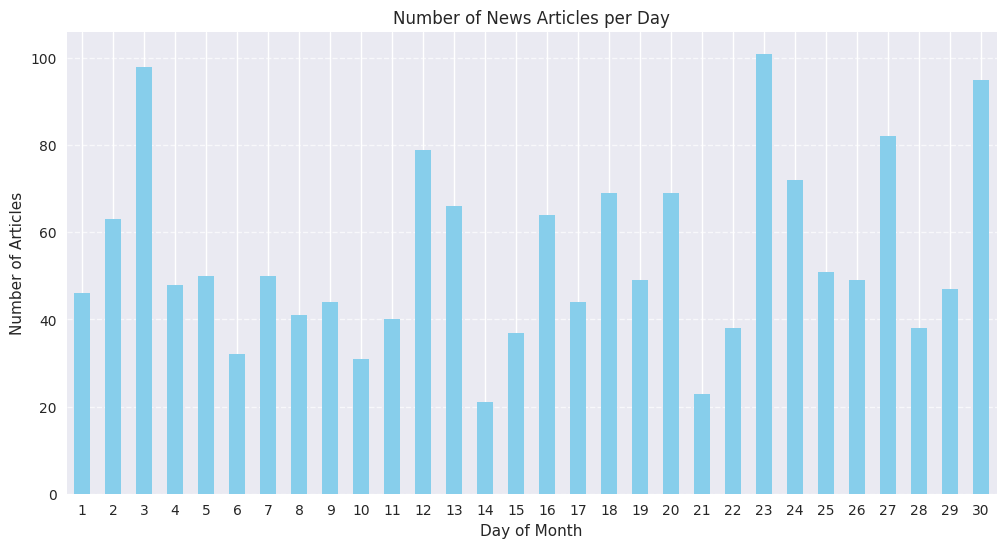

In [17]:
from src.services.alpaca_service import NewsRequest
from datetime import datetime, timedelta

end_date = datetime.now()
start_date = end_date - timedelta(days=60)
        
request = NewsRequest(
    symbols="SPY",
    start=start_date,
    end=end_date,
    #limit=100,
)

news = alpaca.news_client.get_news(request)
news_df = news.df.reset_index()
# Take a peak at the data structure
print(news_df.columns)
print(news_df.head())
# Sort all rows by the created_at column
news_df = news_df.sort_values(by='created_at', ascending=False)
# Now create a histogram showing the number of articles per every hour
news_df['day'] = news_df['created_at'].dt.day
news_df['day'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of News Articles per Day')
plt.xlabel('Day of Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
[1,2,3][2]

3

In [ ]:

# ============================================================================
# PART 2: EXPLORING THE EMBEDDING SERVICE
# ============================================================================
# 
# The EmbeddingService converts textual information (news headlines) into
# numerical vectors that our machine learning model can process. This is
# the bridge between human-readable financial news and mathematical models.
#
# Understanding this process is crucial because it's how we capture "market
# sentiment" and convert it into actionable signals.
# ============================================================================

print("\n\n🧠 PART 2: Exploring the Embedding Service (Text to Numbers)")
print("-" * 60)

# Initialize the Embedding service
print("Initializing Embedding Service (loading language models)...")
embedding_service = EmbeddingService()


In [ ]:

# EXPLORATION 4: Understanding Embeddings
# =======================================
# Let's see how financial headlines get converted into numerical vectors
# and what these representations capture about market sentiment.

def explore_headline_embeddings():
    """
    Explore how different types of financial headlines get converted into
    numerical representations and what these embeddings capture.
    """
    print("\n🔤 Understanding Headline Embeddings")
    print("=" * 40)
    
    # Create sample headlines that represent different market scenarios
    sample_headlines = [
        "Federal Reserve raises interest rates by 0.75%",           # Monetary policy
        "S&P 500 rallies on strong earnings reports",              # Positive market news
        "Inflation data shows unexpected decline",                 # Economic data
        "Tech stocks plummet amid recession fears",               # Negative market news
        "GDP growth exceeds economists' expectations",             # Economic growth
        "Market volatility increases amid geopolitical tensions"   # Risk/uncertainty
    ]
    
    print("Sample Financial Headlines:")
    for i, headline in enumerate(sample_headlines, 1):
        print(f"{i}. {headline}")
    
    # Generate embeddings for each headline
    print(f"\n🔢 Converting Headlines to {embedding_service.embedding_dim}-Dimensional Vectors...")
    embeddings = []
    
    for i, headline in enumerate(sample_headlines):
        embedding = embedding_service.extract_headline_embedding(headline)
        embeddings.append(embedding)
        print(f"Headline {i+1}: Vector shape {embedding.shape}, norm: {np.linalg.norm(embedding):.3f}")
    
    embeddings = np.array(embeddings)
    
    # Calculate similarity between headlines
    print(f"\n📏 Semantic Similarity Analysis:")
    print("(Higher values = more semantically similar)")
    print("\nSimilarity Matrix:")
    print("     ", end="")
    for i in range(len(sample_headlines)):
        print(f"{i+1:6d}", end="")
    print()
    
    for i in range(len(embeddings)):
        print(f"{i+1:2d}: ", end="")
        for j in range(len(embeddings)):
            similarity = np.dot(embeddings[i], embeddings[j])
            print(f"{similarity:6.3f}", end="")
        print()
    
    # Find most and least similar pairs
    similarities = []
    for i in range(len(embeddings)):
        for j in range(i+1, len(embeddings)):
            sim = np.dot(embeddings[i], embeddings[j])
            similarities.append((i, j, sim, sample_headlines[i][:30], sample_headlines[j][:30]))
    
    similarities.sort(key=lambda x: x[2], reverse=True)
    
    print(f"\n🔗 Most Similar Headlines:")
    for i, (idx1, idx2, sim, h1, h2) in enumerate(similarities[:2]):
        print(f"{i+1}. Similarity: {sim:.3f}")
        print(f"   '{h1}...' ↔ '{h2}...'")
    
    print(f"\n🔀 Least Similar Headlines:")
    for i, (idx1, idx2, sim, h1, h2) in enumerate(similarities[-2:]):
        print(f"{i+1}. Similarity: {sim:.3f}")
        print(f"   '{h1}...' ↔ '{h2}...'")
    
    return embeddings, sample_headlines

# Run the embedding exploration
embeddings_data, sample_headlines = explore_headline_embeddings()


In [ ]:

# EXPLORATION 5: Understanding Sentiment Analysis
# ===============================================
# Sentiment provides the emotional context that embeddings alone might miss.

def explore_sentiment_analysis():
    """
    Explore how the sentiment analysis works and what insights it provides
    about market psychology embedded in news headlines.
    """
    print("\n\n😊 Understanding Sentiment Analysis")
    print("=" * 40)
    
    # Use the same sample headlines to show sentiment extraction
    print("Analyzing sentiment for our sample headlines...")
    print("Format: [Positive, Negative, Intensity]")
    print()
    
    sentiments = []
    for i, headline in enumerate(sample_headlines):
        sentiment_vector = embedding_service.extract_sentiment_vector(headline)
        sentiments.append(sentiment_vector)
        
        # Interpret the sentiment
        pos, neg, intensity = sentiment_vector
        if pos > neg:
            sentiment_label = "POSITIVE"
            confidence = pos
        else:
            sentiment_label = "NEGATIVE" 
            confidence = neg
        
        print(f"{i+1}. {headline[:50]}...")
        print(f"   Sentiment: {sentiment_vector} → {sentiment_label} (intensity: {intensity:.2f})")
        print()
    
    # Analyze sentiment patterns
    sentiments = np.array(sentiments)
    avg_sentiment = np.mean(sentiments, axis=0)
    
    print(f"📊 Sentiment Statistics:")
    print(f"Average Positive: {avg_sentiment[0]:.3f}")
    print(f"Average Negative: {avg_sentiment[1]:.3f}")
    print(f"Average Intensity: {avg_sentiment[2]:.3f}")
    
    # Create a visualization of sentiment distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Sentiment polarity (positive vs negative)
    polarity = sentiments[:, 0] - sentiments[:, 1]  # positive - negative
    ax1.bar(range(1, len(sample_headlines)+1), polarity, 
            color=['green' if p > 0 else 'red' for p in polarity])
    ax1.set_title('Sentiment Polarity by Headline', fontweight='bold')
    ax1.set_xlabel('Headline Number')
    ax1.set_ylabel('Polarity (Positive - Negative)')
    ax1.axhline(0, color='black', linestyle='-', alpha=0.3)
    ax1.grid(True, alpha=0.3)
    
    # Sentiment intensity
    ax2.bar(range(1, len(sample_headlines)+1), sentiments[:, 2], color='blue', alpha=0.7)
    ax2.set_title('Sentiment Intensity by Headline', fontweight='bold')
    ax2.set_xlabel('Headline Number')
    ax2.set_ylabel('Intensity (0 = Neutral, 1 = Highly Emotional)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return sentiments

# Run the sentiment exploration
sentiment_data = explore_sentiment_analysis()


In [ ]:

# EXPLORATION 6: Temporal Bucketing and Model Input Preparation
# =============================================================
# This shows how multiple headlines get combined and prepared for the model.

def explore_temporal_processing():
    """
    Demonstrate how multiple headlines from the same time period get combined
    using sentiment-aware weighting, preparing data for model consumption.
    """
    print("\n\n⏰ Temporal Processing and Model Input Preparation")
    print("=" * 55)
    
    # Simulate multiple headlines from the same time bucket
    print("Simulating multiple headlines from the same trading day:")
    bucket_headlines = [
        "Fed announces surprise rate cut to support economy",      # High positive impact
        "Market opens higher on Fed news",                        # Moderate positive
        "Analysts upgrade outlook following Fed decision",         # Moderate positive  
        "Some investors remain cautious about economic outlook"    # Mild negative
    ]
    
    for i, headline in enumerate(bucket_headlines, 1):
        print(f"{i}. {headline}")
    
    # Process this bucket of headlines
    combined_embedding, combined_sentiment = embedding_service.process_news_for_temporal_bucket(
        bucket_headlines, 
        bucket_identifier="sample_bucket"
    )
    
    print(f"\n🔄 Processing Results:")
    print(f"Individual headlines: {len(bucket_headlines)}")
    print(f"Combined embedding shape: {combined_embedding.shape}")
    print(f"Combined sentiment vector: {combined_sentiment}")
    print(f"Combined sentiment interpretation:")
    pos, neg, intensity = combined_sentiment
    overall_sentiment = "POSITIVE" if pos > neg else "NEGATIVE"
    print(f"   → {overall_sentiment} sentiment with {intensity:.2f} intensity")
    
    # Show how individual sentiments contributed to the combination
    print(f"\n📊 Individual vs Combined Analysis:")
    individual_sentiments = [embedding_service.extract_sentiment_vector(h) for h in bucket_headlines]
    
    print("Individual sentiments:")
    for i, (headline, sentiment) in enumerate(zip(bucket_headlines, individual_sentiments)):
        weight = sentiment[2] + 0.1  # This is the weighting used
        print(f"{i+1}. Intensity: {sentiment[2]:.2f}, Weight: {weight:.2f}")
        print(f"   {headline[:60]}...")
    
    print(f"\nCombined result represents the market's likely focus on the most")
    print(f"emotionally charged news, weighted by sentiment intensity.")
    
    return combined_embedding, combined_sentiment

# Run the temporal processing exploration
final_embedding, final_sentiment = explore_temporal_processing()


In [ ]:

# ============================================================================
# SUMMARY AND NEXT STEPS
# ============================================================================

print("\n\n🎯 SUMMARY: What We've Learned")
print("=" * 60)

print("✅ ALPACA SERVICE (EMS) Capabilities:")
print("   → Account monitoring and risk management")
print("   → Historical price data for model training")
print("   → News data collection for sentiment analysis")
print("   → Order submission and execution (ready for live trading)")

print("\n✅ EMBEDDING SERVICE Capabilities:")
print("   → Convert headlines to 384-dimensional semantic vectors")
print("   → Extract 3-dimensional sentiment signals [pos, neg, intensity]")
print("   → Combine multiple headlines using sentiment-aware weighting")
print("   → Prepare temporally-ordered sequences for model consumption")

print("\n🚀 READY FOR NEXT PHASE:")
print("   → Your data pipeline is working and producing clean inputs")
print("   → Headlines are converted to numerical representations")
print("   → Sentiment provides emotional context for market psychology")
print("   → Temporal bucketing creates structured sequences")
print("   → All outputs are properly formatted for your cross-attention model")

print("\n📝 KEY INSIGHTS FOR MODEL DESIGN:")
print(f"   → Embedding dimension: {embedding_service.embedding_dim} (headline semantics)")
print(f"   → Sentiment dimension: {embedding_service.sentiment_dim} (market psychology)")
print("   → Temporal bucketing preserves chronological relationships")
print("   → Sentiment-weighted combination simulates market attention")

print("\n🔬 EXPERIMENT IDEAS:")
print("   1. Try different temporal bucket sizes (hourly vs daily)")
print("   2. Experiment with different sentiment weighting strategies")
print("   3. Analyze correlation between sentiment intensity and price moves")
print("   4. Test the system with different financial instruments")

print("\n" + "=" * 60)
print("🎉 Exploration Complete! Your algorithmic trading foundation is solid.")
print("Ready to build the cross-attention model in Phase 2!")

In [ ]:
from src.services.huggingface_models import load_sentiment_analyzer

# Example usage that works identically for both models
def test_sentiment_analysis():
    """
    Demonstrate how the unified interface abstracts away model differences.
    """
    
    # Test data
    financial_texts = [
        "The company reported strong quarterly earnings, beating analyst expectations by 15%",
        #"Due to supply chain disruptions, quarterly revenue declined significantly",
        #"The stock price remained stable with no major news announcements"
    ]
    
    # Test both models with identical interface
    for model_name in ['finbert', 'fingpt']:
        print(f"\n=== Testing {model_name.upper()} ===")
        
        # Load the analyzer - this handles all the complexity internally
        analyzer = load_sentiment_analyzer(model_name)
        
        # Single text analysis
        print("\nSingle text analysis:")
        for text in financial_texts:
            result = analyzer.analyze_sentiment(text)
            print(f"Text: {text[:50]}...")
            print(f"Sentiment: {result['sentiment']} (confidence: {result['confidence']:.3f})")
        
        # Batch analysis (more efficient for multiple texts)
        print("\nBatch analysis:")
        batch_results = analyzer.analyze_batch(financial_texts)
        for i, result in enumerate(batch_results):
            print(f"Text {i+1}: {result['sentiment']} ({result['confidence']:.3f})")

# Run the test
test_sentiment_analysis()

/workspace/.venv/lib/python3.13/site-packages/transformers/utils/hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(



=== Testing FINBERT ===
Loading FinBERT sentiment analyzer...
Loading FinBERT with cache directory: /app/.cache/huggingface
FinBERT loaded successfully on cpu

Single text analysis:
Text: The company reported strong quarterly earnings, be...
Sentiment: negative (confidence: 0.953)
Text: Due to supply chain disruptions, quarterly revenue...
Sentiment: neutral (confidence: 0.975)
Text: The stock price remained stable with no major news...
Sentiment: positive (confidence: 0.830)

Batch analysis:
Text 1: negative (0.953)
Text 2: neutral (0.975)
Text 3: positive (0.830)

=== Testing FINGPT ===
Loading FinGPT sentiment analyzer...
Already authenticated as: mathnathan
Loading FinGPT with cache directory: /app/.cache/huggingface


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

: 